In [1]:
import os
import time

# Repeat for 60 seconds
counter = 0
while counter < 10:
    # Run the docker stats command and save the output in stats.txt
    os.system("docker stats --no-stream >> stats.txt")
    # Wait for 1 second
    time.sleep(1)
    counter+=1

In [1]:
import re
import numpy as np

stats = []
# Read the file
with open('./stats.txt', 'r') as f:
    line_counter = 0
    for line in f:
        words = line.split()
        try:
            # Use regex to only include words that has a number in it
            if re.search(r'\d', words[0]) and line_counter%4 != 0:
                stats.append(words)
            line_counter += 1
        except Exception as e:
            print(e)

# Initialize the stats array
memory_stats_preprocessor = []
memory_stats_alamAPI_API = []
memory_stats_alamAPI_DB = []

cpu_stats_preprocessor = []
cpu_stats_alamAPI_API = []
cpu_stats_alamAPI_DB = []

line_counter = 0
for items in stats:
    counter = line_counter % 3
    if counter == 0:
        cpu_stats_preprocessor.append(items[2])
        memory_stats_preprocessor.append(items[3])
    elif counter == 1:
        cpu_stats_alamAPI_API.append(items[2])
        memory_stats_alamAPI_API.append(items[3])
    elif counter == 2:
        cpu_stats_alamAPI_DB.append(items[2])
        memory_stats_alamAPI_DB.append(items[3])
    line_counter += 1



# For CPU stats split the % sign and convert to float
cpu_stats_preprocessor = [float(i.split('%')[0]) for i in cpu_stats_preprocessor]
print("CPU Stats Preprocessor: ", cpu_stats_preprocessor)
cpu_stats_alamAPI_API = [float(i.split('%')[0]) for i in cpu_stats_alamAPI_API]
print("CPU Stats alamAPI API: ", cpu_stats_alamAPI_API)
cpu_stats_alamAPI_DB = [float(i.split('%')[0]) for i in cpu_stats_alamAPI_DB]
print("CPU Stats alamAPI DB: ", cpu_stats_alamAPI_DB)

# use regex to put the non-numeric characters in another array (as a string)
size_stats_preprocessor = [re.sub(r'[0-9]+', '', i) for i in memory_stats_preprocessor]
size_stats_alamAPI_API = [re.sub(r'[0-9]+', '', i) for i in memory_stats_alamAPI_API]
size_stats_alamAPI_DB = [re.sub(r'[0-9]+', '', i) for i in memory_stats_alamAPI_DB]

print("Size Stats Preprocessor: ", size_stats_preprocessor)
print("Size Stats alamAPI API: ", size_stats_alamAPI_API)
print("Size Stats alamAPI DB: ", size_stats_alamAPI_DB)

# Use regex to delete the non-numeric characters and convert to float
memory_stats_preprocessor = [float(re.sub(r'[a-zA-Z]+', '', i)) for i in memory_stats_preprocessor]
print("Memory Stats Preprocessor: ", memory_stats_preprocessor)
memory_stats_alamAPI_API = [float(re.sub(r'[a-zA-Z]+', '', i)) for i in memory_stats_alamAPI_API]
print("Memory Stats alamAPI API: ", memory_stats_alamAPI_API)
memory_stats_alamAPI_DB = [float(re.sub(r'[a-zA-Z]+', '', i)) for i in memory_stats_alamAPI_DB]
print("Memory Stats alamAPI DB: ", memory_stats_alamAPI_DB)



CPU Stats Preprocessor:  [0.1, 0.1, 0.03, 0.03, 0.04, 0.04, 0.04, 0.04, 0.06, 0.06, 0.05, 0.05, 0.03, 0.03, 0.03, 0.03, 0.05, 0.05, 0.05, 0.05, 0.12, 0.12, 0.04, 0.04, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.05, 0.05, 0.05, 0.05, 0.03, 0.03, 0.04, 0.04, 0.03, 0.03, 0.1, 0.1, 0.07, 0.07, 0.09, 0.09, 0.09, 0.03, 0.03, 0.03, 0.03, 0.06, 0.06, 0.02, 0.02, 0.04, 0.04, 0.07, 0.07, 0.12, 0.12, 0.05, 0.05, 0.04, 0.04, 0.03, 0.03, 0.05, 0.05, 0.07, 0.07, 0.03, 0.03, 0.02, 0.02, 0.03, 0.03, 0.04, 0.04, 0.17, 0.17, 0.04, 0.04, 0.04, 0.04, 0.03, 0.03, 0.08, 0.08, 0.05, 0.05, 0.05, 0.05, 0.05, 0.03, 0.03, 0.07, 0.07, 0.03, 0.03, 0.17, 0.17, 0.04, 0.04, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.06, 0.06, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.12, 0.12, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02, 0.03, 0.03, 0.05, 0.05, 0.07, 0.07, 0.03, 0.03, 0.03, 0.03, 0.06, 0.06, 0.04, 0.04, 0.05, 0.05, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.07, 0.07, 0.02, 0.02, 

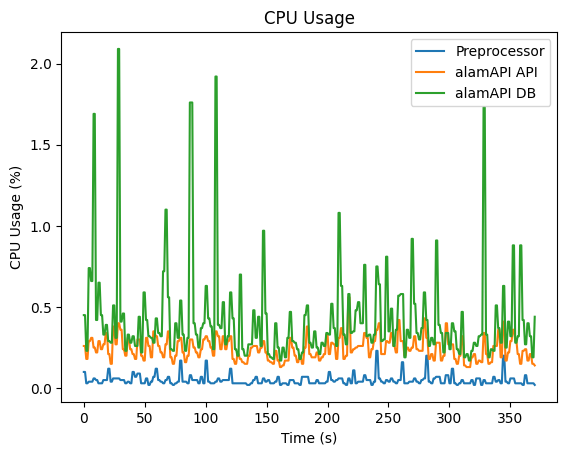

In [2]:
# Plot the CPU stats
import matplotlib.pyplot as plt
plt.plot(cpu_stats_preprocessor, label="Preprocessor")
plt.plot(cpu_stats_alamAPI_API, label="alamAPI API")
plt.plot(cpu_stats_alamAPI_DB, label="alamAPI DB")
plt.xlabel('Time (s)')
plt.ylabel('CPU Usage (%)')
plt.title('CPU Usage')
plt.legend()
plt.show()